# Mobile Activity & Usage Prediction Dataset 

Topic:
Study and manipulation of data from different sources for class classification using 
artificial intelligence (AI) algorithms.\
The data acquisition can be done using datasets available on the web or else acquired
through systems with sensors.\
The dataset must have at least **5 features** (columns with different characteristics).

## Project Requirements 

<input type="checkbox" checked/> Analysis of Dataset Features. \
<input type="checkbox" checked/>  Preparation of the data to put into an AI model.\
<input type="checkbox" checked/> Study of the most suitable Ai model for the chosen dataset.\
<input type="checkbox" checked/> Application of the selected Ai model to the dataset with and without the application of PCA/LDA techniques.\
<input type="checkbox" checked/> Analysis of the Ai model training (Confusion matrix, learning curves, etc...).\
<input type="checkbox" checked/> Study of the most important features of the dataset (feature importance) to improve the accuracy of the Ai model.\
<input type="checkbox" checked/> Feature Importance self Obtained. (By own algorythms)

## Valorization of the Process

<input type="checkbox" checked/> Hardware for acquiring the dataset.\
<input type="checkbox" checked/> Application of data combination techniques (example: data alignment,
downsampling/upsampling, etc...).\
<input type="checkbox" checked/> Application of data quality improvement techniques (example: filters).\
<input type="checkbox" checked/> Other approaches...

## Brief Description of the Work

The following code analyses two datasets collected from 6 different cell phones using the as a collection method Home Assistant resources to gather data from 51 different features with the objective of test and develop skills in the field of data fusion according with the project defined by the professor V. Oliveira (voliveira@ipca.pt)

The authors of the following project and respective data are: 

@fandrepm18\
@JoaquinDillen\
@nunof98




# Load Dataset

In [1]:
import pandas as pd

filename = 'reclassifying_features/dataset_v1.csv'
#filename = 'New_Dataset_v1.csv'

# load dataset and set time column as index
df = pd.read_csv(f'datasets/{filename}').set_index('time')

# Show dataset
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,0.00,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,22.20,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.80,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.90,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.60,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,0.0,18.25,0.0,off,341.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,0.0,17.60,0.0,off,341.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,0.0,17.15,0.0,off,351.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B


In [2]:
# Display Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5664 entries, 2023-01-17 00:15:00 to 2023-01-26 20:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_memory                  5664 non-null   float64
 1   battery_power               5664 non-null   float64
 2   last_update_trigger         5664 non-null   object 
 3   light_sensor                5664 non-null   float64
 4   active_notification_count   5664 non-null   float64
 5   pressure_sensor             5664 non-null   float64
 6   battery_temperature         5664 non-null   float64
 7   screen_brightness           5664 non-null   float64
 8   device_locked               5664 non-null   object 
 9   wifi_link_speed             5664 non-null   float64
 10  interactive                 5664 non-null   object 
 11  doze_mode                   5664 non-null   object 
 12  battery_level               5664 non-null   float64
 13  wifi_

# Analysis of dataset features
Analyses the statistical information about each variable.

app_memory                    0
battery_power                 0
last_update_trigger           0
light_sensor                  0
active_notification_count     0
pressure_sensor               0
battery_temperature           0
screen_brightness             0
device_locked                 0
wifi_link_speed               0
interactive                   0
doze_mode                     0
battery_level                 0
wifi_signal_strength          0
total_tx_gb                   0
wifi_frequency                0
app_rx_gb                     0
app_tx_gb                     0
last_used_app                 0
total_rx_gb                   0
detected_activity             0
proximity_sensor              0
steps_sensor                  0
headphones                    0
volume_level_call             0
volume_level_music            0
volume_level_accessibility    0
music_active                  0
wifi_connection               0
network_type                  0
mobile_rx_gb                  0
mobile_t

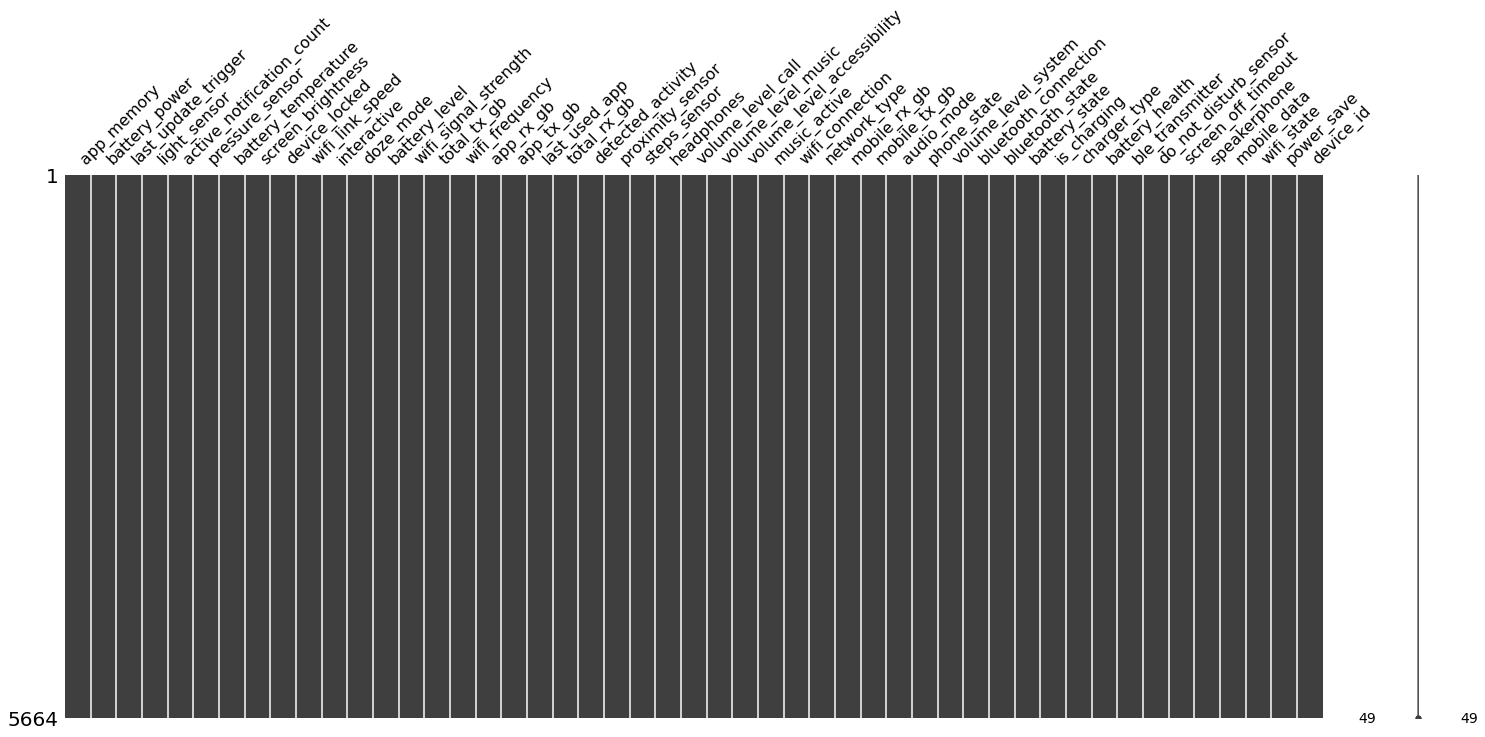

In [3]:
import missingno as msno

# check for missing values
msno.matrix(df)
df.isnull().sum()

In [4]:
# Quick view of data statistical behavior.
df.describe()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,...,total_rx_gb,proximity_sensor,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,65.701824,2.571404,212.029130,19.840668,22.161800,115.261931,54.308467,-24.095224,...,12.011089,2.288899,21117.117435,2.708451,4.004726,3.812421,0.671618,0.035222,0.962688,0.332182
std,0.012065,0.414615,429.619220,3.731159,412.718471,8.586159,36.712059,160.083058,32.112288,29.331055,...,15.779058,2.344625,30595.807787,3.046022,5.132431,4.328333,1.292121,0.068907,2.355609,0.457608
min,0.000000,-3.010000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,0.000000,0.000000,29.000000,-54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012000,0.000000,0.000000,1.000000,0.000000,21.400000,0.000000,0.000000,58.000000,-1.000000,...,3.171000,2.500000,7169.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.021000,0.000000,21.714286,3.800000,0.000000,25.050000,27.000000,234.000000,81.000000,0.000000,...,18.885000,5.000000,44298.000000,6.000000,7.000000,7.333333,0.726000,0.039000,0.000000,0.500000
max,0.064000,5.480000,15635.727273,22.500000,1029.650000,41.300000,237.500000,680.200000,100.000000,0.000000,...,52.314000,8.000000,102229.000000,8.000000,24.000000,15.000000,5.681000,0.340500,14.000000,2.000000


## Distribution graphic

A distribution graphic, also known as a distribution plot or a density plot, is a type of data visualization that is used to represent the distribution of a dataset. The plot shows how the data is distributed across a range of values, and it provides information about the shape, center, and spread of the distribution.

c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='last_used_app', ylabel='count'>

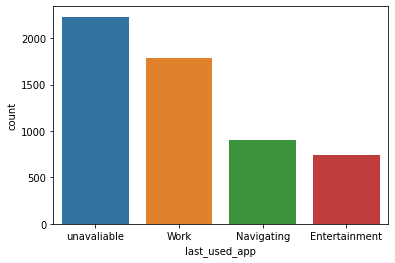

In [5]:
import seaborn as sns

# Plot of labels.
sns.countplot(df['last_used_app'])

As we can see in the previous plot, the samples don't have the same size, this is important as we will need to make take actions to prevent obtaining bad results when creating the classifiers and training our models. 

In [7]:
# Print a description of the percentage of each class available in the dataset.
print('% of classes')
round((df['last_used_app'].value_counts() / df.shape[0]) * 100, 2)

% of classes


unavaliable      39.39
Work             31.60
Navigating       15.93
Entertainment    13.08
Name: last_used_app, dtype: float64

c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='device_id', ylabel='count'>

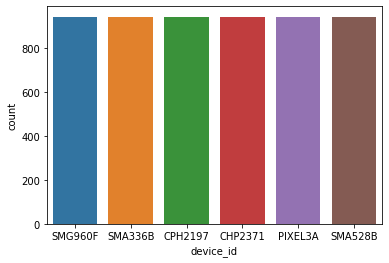

In [8]:
# a plot of the data available for each phone. 
sns.countplot(df['device_id'])

In [10]:
# A percentage of the data for each phone that provide data for the hole dataset.
print('% of phones')
round((df['device_id'].value_counts() / df.shape[0]) * 100, 2)

% of phones


SMG960F    16.67
SMA336B    16.67
CPH2197    16.67
CHP2371    16.67
PIXEL3A    16.67
SMA528B    16.67
Name: device_id, dtype: float64

<AxesSubplot: title={'center': 'Total TX distribution'}, ylabel='Density'>

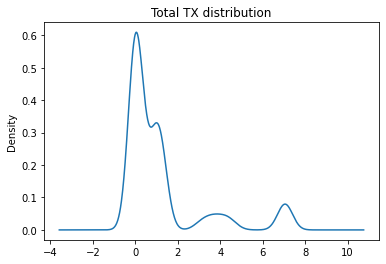

In [11]:
from matplotlib import pyplot as plt

# A Graphic of the distribution of values for the Total TX feature.
plt.title('Total TX distribution')
df['total_tx_gb'].plot(kind='kde')

<AxesSubplot: title={'center': 'Total RX distribution'}, ylabel='Density'>

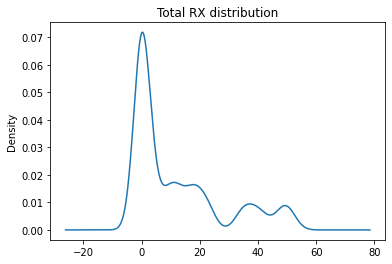

In [13]:
# A Graphic of the distribution of values for the Total RX feature.
plt.title('Total RX distribution')
df['total_rx_gb'].plot(kind='kde')

## Catplot Graphic

The Catplot graphic creates a chart that shows the relationship between two variables, the first case is "last_used_app" and "total_tx_gb".

On the x-axis, the chart will display different categories of "last_used_app", like "Work", "Entretainment", and so on. On the y-axis, the chart will show the values of "total_tx_gb", which is a measure of how much data has been transmitted.

The purpose of this chart is to show how the values of "total_tx_gb" are distributed across the different categories of "last_used_app". This could help us understand, for example, which apps are responsible for the most data usage, or how data usage varies across different types of apps. The specific type of categorical plot used in this code is not specified, but it could be a box plot, violin plot, or other types of plot that allow us to visualize the distribution of data for each category.

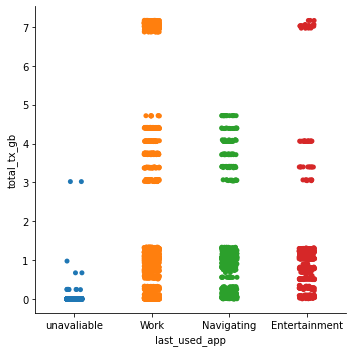

In [14]:
sns.catplot(data=df, x='last_used_app', y='total_tx_gb')

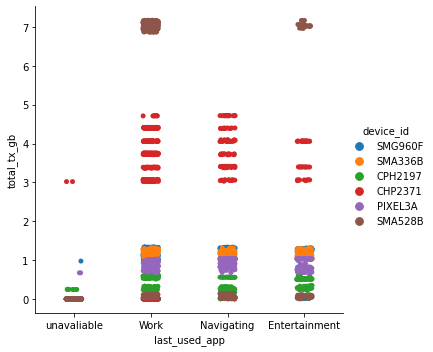

In [15]:
sns.catplot(data=df, x='last_used_app', y='total_tx_gb', hue='device_id')

<AxesSubplot: title={'center': 'Update Trigger'}>

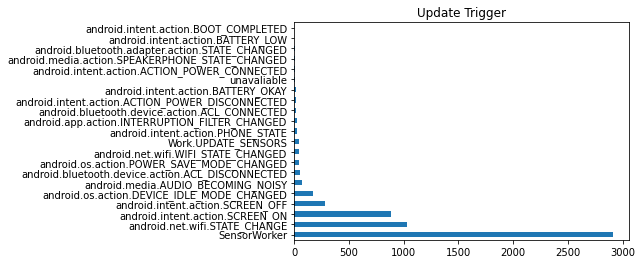

In [16]:
# Plot a Bar graphic of occurrences for the update trigger
df['last_update_trigger'].value_counts().plot(kind='barh', title='Update Trigger')

Here we make a plot which shows the update trigger application or signal and is evident that the mos frequent update trigger that we have is from "SensorWorker"
which is from the application for collecting data.

## Encode categorical features

Encoders are used to transform categorical data into a numerical format, which allows the data to be more easily analyzed and used for machine learning tasks. By encoding categorical data, the data can be represented in a way that can be more easily processed by algorithms, which can lead to more accurate predictions and insights.

In [18]:
import category_encoders as ce

# select categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()

# Create the encoder
encoder = ce.OrdinalEncoder(cols=cat_cols)

# Apply the encoder
df = encoder.fit_transform(df)

# Display the dataset
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [19]:
# Quick view of data statistical behavior.
df.describe()

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,4.059322,65.701824,2.571404,212.029130,19.840668,22.161800,1.324153,115.261931,...,1.432203,1.424082,2.014301,1.099047,1.099223,1.576977,1.618997,1.517655,1.168785,3.500000
std,0.012065,0.414615,4.191641,429.619220,3.731159,412.718471,8.586159,36.712059,0.734467,160.083058,...,0.607209,0.494246,1.217467,0.317658,0.389296,0.742784,0.863222,0.726900,0.463128,1.707976
min,0.000000,-3.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.400000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,0.012000,0.000000,1.000000,0.000000,1.000000,0.000000,21.400000,0.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000
75%,0.021000,0.000000,7.000000,21.714286,3.800000,0.000000,25.050000,27.000000,1.000000,234.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000
max,0.064000,5.480000,21.000000,15635.727273,22.500000,1029.650000,41.300000,237.500000,3.000000,680.200000,...,4.000000,2.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


# Correlation Matrix

A correlation matrix is a useful tool in analyzing the relationship between different features in a dataset. 
It provides a numerical measure of the strength and direction of the linear relationship between pairs of variables. By examining the correlation matrix, it is possible to identify which pairs of features are strongly related and which are weakly related. This can help to identify potential redundancies or collinearities between features, as well as highlight which features are most strongly associated with the target variable. Furthermore, the correlation matrix can help to identify potential issues such as multicollinearity, which can affect the stability and accuracy of regression models. Overall, the correlation matrix is a valuable tool in exploratory data analysis and can provide insights that are not immediately apparent from examining individual features in isolation.

Text(0.5, 1.0, 'Correlation between variables')

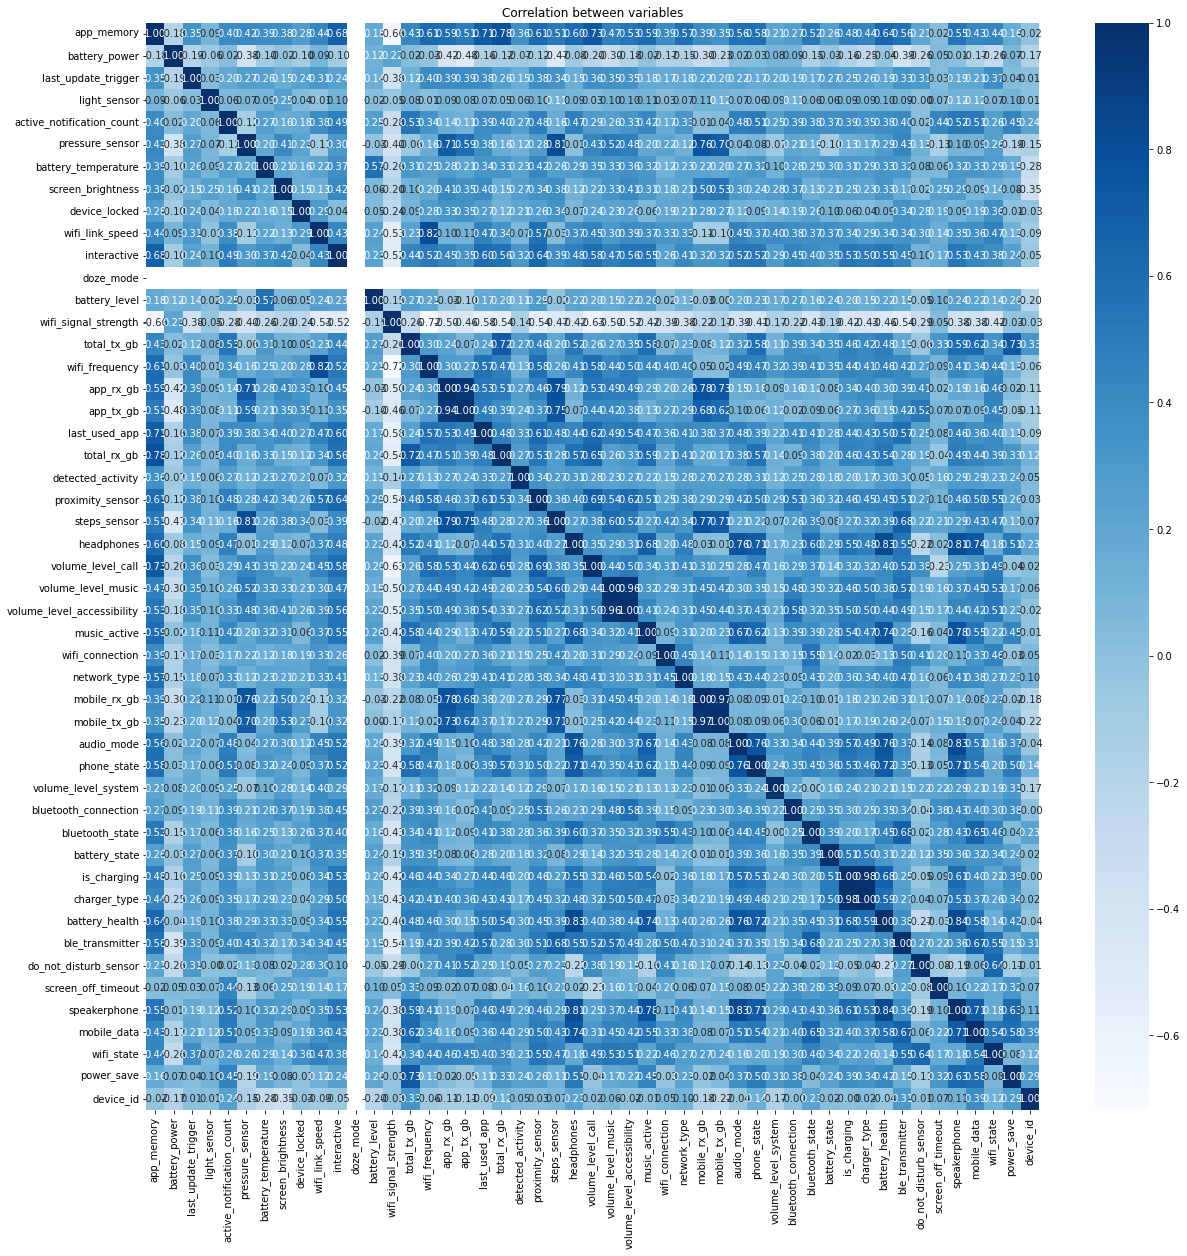

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between variables')

All the values shown in the matrix are the respective correlations between the two variables that meet from the columns and rows of the matrix, this value goes from -1 to 1 
where exactly –1 means A perfect negative (downward sloping) linear relationship and +1 means A perfect positive (upward sloping) linear relationship this correlations might be the key for a classifier to be able to properly detect the target and the conjunction of different features with this information. 

# Get features and labels

Separate the features and the respective labels

In [21]:
# get labels
y = df['last_used_app']
y

time
2023-01-17 00:15:00    1
2023-01-17 00:30:00    1
2023-01-17 00:45:00    1
2023-01-17 01:00:00    1
2023-01-17 01:15:00    1
                      ..
2023-01-26 19:00:00    3
2023-01-26 19:15:00    3
2023-01-26 19:30:00    3
2023-01-26 19:45:00    3
2023-01-26 20:00:00    3
Name: last_used_app, Length: 5664, dtype: int32

For a classifier, features with very weak or low standard deviation can be less useful in making accurate predictions because they do not provide enough variation to help distinguish between different classes or categories.

A low standard deviation means that the values of a feature are clustered tightly around the mean, and there is little variation or spread in the data. This can result in reduced discriminatory power, as the feature may not have enough variability to help differentiate between different classes or categories.

In contrast, features with high standard deviation or more variability can be more informative and useful in a classifier as they provide more distinctive patterns to help distinguish between different classes.

In [22]:
# drop irrelevant columns (std < 1)
df = df.drop(df.std()[df.std() < 1.0].index.values, axis=1)
df

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,1,0.000000,0.00,0.0,0.00,0.0,0.0,74.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:30:00,1,0.000000,0.00,0.0,22.20,0.0,0.0,73.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:45:00,1,0.000000,0.00,0.0,21.80,0.0,0.0,72.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:00:00,1,0.000000,0.00,0.0,21.90,0.0,0.0,71.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:15:00,1,0.000000,0.00,0.0,21.60,0.0,0.0,70.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,3,21.333333,9.00,0.0,18.25,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:15:00,10,13.500000,10.00,0.0,17.60,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:30:00,11,0.666667,11.75,0.0,17.15,0.0,351.0,75.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6


In [23]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,1,0.000000,0.00,0.0,0.00,0.0,0.0,74.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:30:00,1,0.000000,0.00,0.0,22.20,0.0,0.0,73.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:45:00,1,0.000000,0.00,0.0,21.80,0.0,0.0,72.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:00:00,1,0.000000,0.00,0.0,21.90,0.0,0.0,71.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:15:00,1,0.000000,0.00,0.0,21.60,0.0,0.0,70.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,3,21.333333,9.00,0.0,18.25,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:15:00,10,13.500000,10.00,0.0,17.60,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:30:00,11,0.666667,11.75,0.0,17.15,0.0,351.0,75.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6


# Split dataset into train and test sets

For the training of the classifier it's necessary to separate the data in two groups training and test, the training is the data the classifier will look and try to define a way to understand and characterize using statistical information about the data itself, and the test data is a separated group of data points which are not available for the model when training and not necessarily behave as the training group and is with this group of data that we see if the model is able to successfully classify the new data not presented before. 

In [25]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Print shape of the data splitted. 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3964, 23) (1700, 23) (3964,) (1700,)


# Classification models

#### Classifiers used:
- **Decision Tree**
- **KNeighbors**
- **MLP**

## 1. Non-normalized values
Non-normalized values are values that have not been rescaled or transformed to have a common scale or distribution.

In [28]:
# Create a dictionary for the results of the classifiers
scores = {}

### 1.1 Decision tree

A decision tree classifier is a machine learning algorithm that recursively splits the data into smaller and smaller subsets based on the values of the input features until a decision can be made. The algorithm selects the feature that provides the best split based on a criterion such as information gain or Gini impurity and partitions the data into branches, with each branch corresponding to a different value of the feature. The process is repeated until the terminal nodes are reached, at which point a decision is made based on the majority class of the corresponding subset. The resulting tree can be used to classify new data points by traversing the tree from the root to the appropriate leaf node based on the values of the input features.

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.92      0.76       537
           3       0.63      0.54      0.58       271
           4       0.78      0.11      0.20       222

    accuracy                           0.78      1700
   macro avg       0.76      0.64      0.63      1700
weighted avg       0.80      0.78      0.75      1700

Train accuracy:	 0.794904137235116
Test accuracy:	 0.7841176470588235


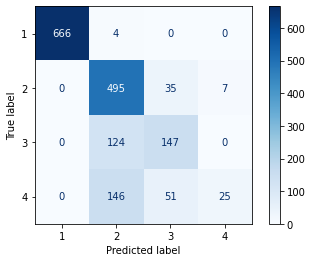

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# build decision tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# train decision tree
tree.fit(X_train, y_train)

# make prediction
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

# Print the results for both training and test 
print(f'Train accuracy:\t {tree.score(X_train, y_train)}')
print(f'Test accuracy:\t {tree.score(X_test, y_test)}')
scores['Decision Tree'] =  tree.score(X_test, y_test)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Blues')

### 1.2 KNeighbors

The K-Nearest Neighbors (KNN) classifier is a machine learning algorithm that works by finding the K closest data points in the training set to the new data point to be classified. The value of K is a hyperparameter that must be set prior to the training process. Once the K nearest neighbors are identified, the algorithm assigns the most common class among those neighbors to the new data point.

The algorithm uses a distance metric such as Euclidean distance or Manhattan distance to calculate the distances between the new data point and the training data points. The choice of distance metric can have a significant impact on the performance of the classifier. The KNN algorithm does not require training the model on the training data, so it is a non-parametric algorithm. The KNN algorithm can work well for simple classification tasks, but can be sensitive to the choice of K and the number of features, and can be computationally expensive for large datasets.

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       670
           2       0.85      0.92      0.89       537
           3       0.87      0.79      0.83       271
           4       0.90      0.79      0.84       222

    accuracy                           0.91      1700
   macro avg       0.90      0.87      0.89      1700
weighted avg       0.91      0.91      0.91      1700

Train accuracy:	 0.9629162462159435
Test accuracy:	 0.9123529411764706


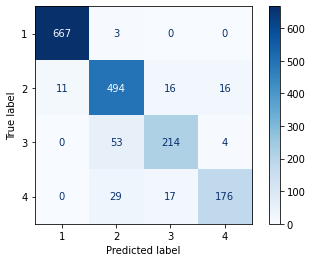

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
knn = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn.fit(X_train, y_train)

# make prediction
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

# Print the results for both training and test
print(f'Train accuracy:\t {knn.score(X_train, y_train)}')
print(f'Test accuracy:\t {knn.score(X_test, y_test)}')
scores['KNN'] =  knn.score(X_test, y_test)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

### 1.3 MLP
The Multi-Layer Perceptron (MLP) classifier is a type of neural network that works by learning a set of weights and biases that map the input data to the output class labels. The MLP consists of multiple layers of interconnected nodes, with the input layer receiving the features and the output layer producing the class probabilities or labels.

The hidden layers perform a series of nonlinear transformations on the input data, allowing the model to learn complex patterns and relationships between the features and the output labels. The weights and biases in the MLP are optimized during the training process using an optimization algorithm such as stochastic gradient descent to minimize the difference between the predicted and true class labels. The MLP classifier can handle complex classification tasks and can generalize well to new data but requires careful tuning of hyperparameters such as the number of hidden layers and neurons, activation functions, and regularization techniques.

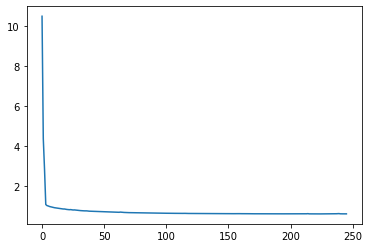

In [31]:
from sklearn.neural_network import MLPClassifier


# build MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)

# train model
mlp.fit(X_train, y_train)
plt.plot(mlp.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.52      1.00      0.69       537
           3       1.00      0.01      0.01       271
           4       0.75      0.01      0.03       222

    accuracy                           0.71      1700
   macro avg       0.82      0.50      0.43      1700
weighted avg       0.82      0.71      0.62      1700

Train accuracy:	 0.7098890010090817
Test accuracy:	 0.71


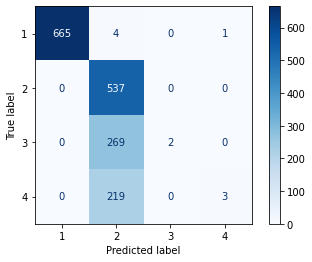

In [32]:
# make prediction
y_pred_mlp = mlp.predict(X_test)

# Print the results for both training and test
print(classification_report(y_test, y_pred_mlp))
print(f'Train accuracy:\t {mlp.score(X_train, y_train)}')
print(f'Test accuracy:\t {mlp.score(X_test, y_test)}')
scores['MLP'] =  mlp.score(X_test, y_test)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, cmap='Blues')

### Classification ensembles and feature selectors

Classification ensembles are machine learning models that combine the predictions of multiple base classifiers to improve the accuracy and robustness of the overall classifier. These ensembles can be created by training multiple classifiers on different subsets of the training data or using different algorithms, and then combining their outputs in various ways such as majority voting, weighted voting, or stacking. The idea behind ensembles is that by combining the strengths of multiple models, the resulting classifier can be more accurate, stable, and resistant to overfitting or noisy data.

#### Classifiers used:
- **Random Forest**
- **Voting**
- **Recursive Feature Elimination**

### 1.4 Random Forest

The Random Forest classifier is an ensemble learning algorithm that combines multiple decision trees to improve the accuracy and robustness of the classifier. The algorithm randomly selects subsets of the training data and features for each tree to create diverse and uncorrelated trees. During training, each tree in the forest is grown independently by recursively splitting the data into smaller subsets based on the values of the input features.

At each split, the algorithm selects the best feature and split point based on a criterion such as information gain or Gini impurity. During prediction, the new data point is passed through each tree in the forest, and the class predictions are obtained by majority voting. The Random Forest algorithm can handle high-dimensional and noisy data and is less prone to overfitting than single decision trees. The performance of the algorithm can be further improved by tuning the hyperparameters such as the number of trees, the depth of each tree, and the size of the feature subsets.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.92      0.96      0.94       537
           3       0.95      0.87      0.91       271
           4       0.92      0.91      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9570588235294117


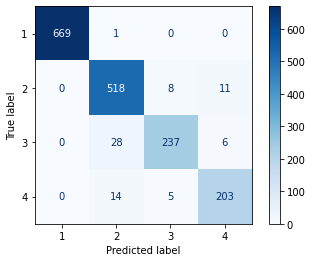

In [33]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
rfc = RandomForestClassifier()
# train random forest
rfc.fit(X_train, y_train)

# make prediction
y_pred_rfc = rfc.predict(X_test)

# Print the results for both training and test
print(classification_report(y_test, y_pred_rfc))
print(f'Train accuracy:\t {rfc.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfc.score(X_test, y_test)}')
scores['Random Forest'] = rfc.score(X_test, y_test)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, cmap='Blues')

### 1.5 Voting

The Voting classifier is an ensemble learning algorithm that combines the predictions of multiple base classifiers to obtain a final prediction. The algorithm works by training multiple classifiers with different algorithms or hyperparameters on the same training data. During prediction, the voting classifier combines the outputs of the base classifiers by majority voting or weighted voting.

In majority voting, the final prediction is the class with the highest number of votes among the base classifiers. In weighted voting, the base classifiers can be assigned different weights according to their performance or reliability, and the final prediction is the class with the highest weighted sum of votes. The Voting classifier can handle diverse types of data and models, and can improve the accuracy and robustness of the classifier by combining the strengths of multiple models. The choice of base classifiers, voting strategy, and weights can affect the performance of the algorithm, and can be tuned through cross-validation.

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.93      0.90      0.92       537
           3       0.83      0.91      0.87       271
           4       0.87      0.84      0.85       222

    accuracy                           0.93      1700
   macro avg       0.91      0.91      0.91      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9808274470232089
Test accuracy:	 0.9311764705882353


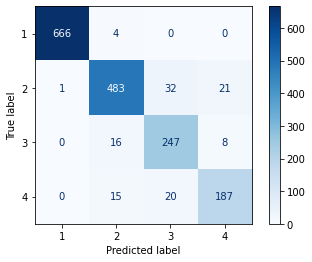

In [34]:
from sklearn.ensemble import VotingClassifier

# build voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('tree', tree),
        ('knn', knn),
        ('mlp', mlp),
        ('rfc', rfc)
    ],
    voting='soft'
)
voting_classifier = voting_classifier.fit(X_train, y_train)

# make prediction
y_pred_voting_classifier = voting_classifier.predict(X_test)

# Print the results for both training and test
print(classification_report(y_test, y_pred_voting_classifier))
print(f'Train accuracy:\t {voting_classifier.score(X_train, y_train)}')
print(f'Test accuracy:\t {voting_classifier.score(X_test, y_test)}')
scores['Voting Classifier'] = voting_classifier.score(X_test, y_test)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_voting_classifier, cmap='Blues')

### 1.6 Recursive Feature Elimination

Recursive Feature Elimination (RFE) is a feature selection algorithm that works by recursively removing the least important features from the dataset until a desired number of features is reached. The algorithm starts by training a model on the entire set of input features and ranks the features according to their importance score.

Then, the least important feature is removed from the dataset, and the model is retrained on the reduced set of features. This process is repeated iteratively until the desired number of features is reached or a performance criterion is met. The performance of the model is evaluated using a validation set or cross-validation, and the optimal number of features is selected based on the highest performance score. RFE can help to reduce the dimensionality of the data, improve the interpretability and generalization of the model, and reduce the risk of overfitting. The choice of the performance metric, ranking criterion, and number of features can affect the performance of the algorithm and should be carefully tuned.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.96      0.88      0.92       271
           4       0.92      0.93      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.95      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 0.9997477295660948
Test accuracy:	 0.9588235294117647


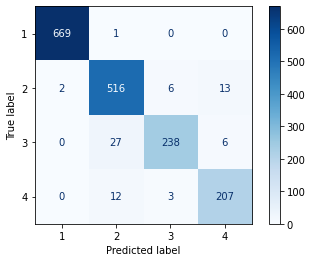

In [35]:
from sklearn.feature_selection import RFE

# build and fit classifier
rfe = RFE(RandomForestClassifier(), step=1).fit(X_train, y_train)

# make prediction
y_pred_rfe = rfe.predict(X_test)

# Print the results for both training and test
print(classification_report(y_test, y_pred_rfe))
print(f'Train accuracy:\t {rfe.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfe.score(X_test, y_test)}')
scores['RFE'] = rfe.score(X_test, y_test)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfe, cmap='Blues')

### PCA or LDA Usage

Our Dataset is presented with several datapoints so we can consider the fact that our dataset is a multi-sensor data fusion application, the need to keep the computational load low is very important, a low-dimensional common representational format may be the answer, to apply a dimension-reducing, or subspace technique to the raw input data. 

### 1.5 PCA

PCA (Principal Component Analysis) is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of uncorrelated variables called principal components while retaining the maximum amount of variance in the data.

In [36]:
# Create a discionary for the scores using the dataset with pca applied
scores_pca = {}

In [37]:
from sklearn.decomposition import PCA

# Create the PCA
pca = PCA(n_components=3)

# apply the PCA to the dataset
X_pca = pca.fit_transform(X)

# Print the shape of the PCA dataset
X_pca.shape, y.shape

((5664, 3), (5664,))

PCA variance_ratio
The percentage of the explained variance is: explained_variance_ratio_

The variance i.e. the eigenvalues of the covariance matrix is: explained_variance_

Formula: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

In [38]:
pca.explained_variance_ratio_

array([9.94993823e-01, 4.73875365e-03, 1.93734503e-04])

In [39]:
pca.explained_variance_ratio_.sum()

0.9999263115533038

As we can see in the previous cell we can reduce the dataset using 3 components and we can still keep 99% of the relevant information for the dataset. 

In [40]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


Once we have the pca applied to our dataset we split the data again and apply the data with the pca reduction to all the models previously tested.

#### 1.5.1 Decision tree

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       670
           2       0.62      0.87      0.72       537
           3       0.88      0.24      0.38       271
           4       0.46      0.41      0.44       222

    accuracy                           0.76      1700
   macro avg       0.74      0.63      0.63      1700
weighted avg       0.78      0.76      0.73      1700

Train accuracy:	 0.7658930373360242
Test accuracy:	 0.7564705882352941


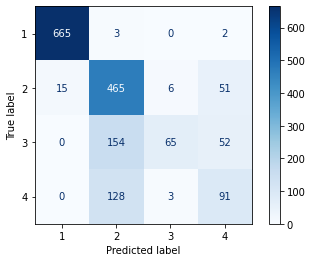

In [42]:
# build decision tree classifier
tree_pca = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_tree_pca = tree_pca.predict(X_test_pca)

# Print the results for both training and test
print(classification_report(y_test_pca, y_pred_tree_pca))
print(f'Train accuracy:\t {tree_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {tree_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Decision Tree PCA'] =  tree_pca.score(X_test_pca, y_test_pca)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_tree_pca, cmap='Blues')

#### 1.5.2 KNeighbors

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       670
           2       0.83      0.90      0.86       537
           3       0.84      0.75      0.79       271
           4       0.87      0.73      0.80       222

    accuracy                           0.89      1700
   macro avg       0.88      0.85      0.86      1700
weighted avg       0.89      0.89      0.89      1700

Train accuracy:	 0.9556004036326943
Test accuracy:	 0.8929411764705882


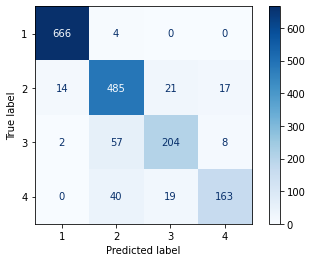

In [43]:
# build KNeighbors classifier
knn_pca = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_knn_pca = knn_pca.predict(X_test_pca)

# Print the results for both training and test
print(classification_report(y_test_pca, y_pred_knn_pca))
print(f'Train accuracy:\t {knn_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {knn_pca.score(X_test_pca, y_test_pca)}')
scores_pca['KNN PCA'] =  knn_pca.score(X_test_pca, y_test_pca)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_knn_pca, cmap='Blues')

#### 1.5.3 MLP

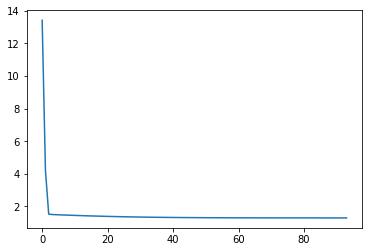

In [44]:
# build MLP classifier
mlp_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_pca.fit(X_train_pca, y_train_pca)
plt.plot(mlp_pca.loss_curve_)

              precision    recall  f1-score   support

           1       0.39      1.00      0.57       670
           2       0.00      0.00      0.00       537
           3       0.00      0.00      0.00       271
           4       0.00      0.00      0.00       222

    accuracy                           0.39      1700
   macro avg       0.10      0.25      0.14      1700
weighted avg       0.16      0.39      0.22      1700

Train accuracy:	 0.3937941473259334
Test accuracy:	 0.3941176470588235


c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


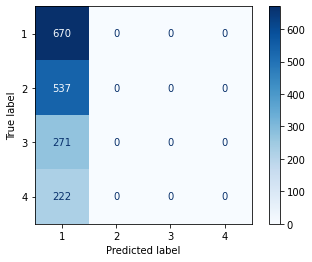

In [45]:
# make prediction
y_pred_mlp_pca = mlp_pca.predict(X_test_pca)

# Print the results for both training and test
print(classification_report(y_test_pca, y_pred_mlp_pca))
print(f'Train accuracy:\t {mlp_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {mlp_pca.score(X_test_pca, y_test_pca)}')
scores_pca['MLP PCA'] =  mlp_pca.score(X_test_pca, y_test_pca)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_mlp_pca, cmap='Blues')

#### 1.5.4 Random Forest

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       670
           2       0.85      0.88      0.87       537
           3       0.84      0.82      0.83       271
           4       0.86      0.79      0.83       222

    accuracy                           0.90      1700
   macro avg       0.88      0.87      0.88      1700
weighted avg       0.90      0.90      0.90      1700

Train accuracy:	 0.9851160443995963
Test accuracy:	 0.9005882352941177


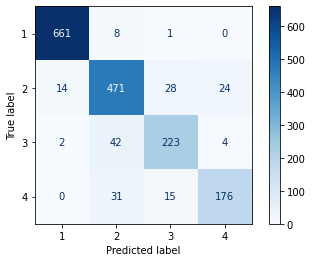

In [46]:
# build random forest classifier
rfc_pca = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)

# Print the results for both training and test
print(classification_report(y_test_pca, y_pred_rfc_pca))
print(f'Train accuracy:\t {rfc_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfc_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Random Forest PCA'] = rfc_pca.score(X_test_pca, y_test_pca)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfc_pca, cmap='Blues')

#### 1.5.5 Voting

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       670
           2       0.86      0.89      0.87       537
           3       0.82      0.79      0.80       271
           4       0.86      0.80      0.83       222

    accuracy                           0.90      1700
   macro avg       0.88      0.87      0.87      1700
weighted avg       0.90      0.90      0.90      1700

Train accuracy:	 0.9790615539858728
Test accuracy:	 0.9011764705882352


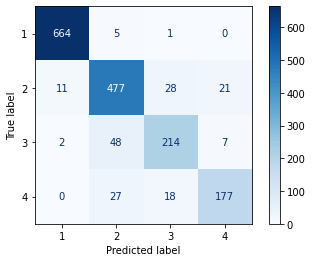

In [47]:
# build voting classifier
voting_classifier_pca = VotingClassifier(
    estimators=[
        ('tree_pca', tree_pca),
        ('knn_pca', knn_pca),
        ('mlp_pca', mlp_pca),
        ('rfc_pca', rfc_pca)
    ],
    voting='soft'
)
voting_classifier_pca = voting_classifier_pca.fit(X_train_pca, y_train_pca)


# make prediction
y_pred_voting_classifier_pca = voting_classifier_pca.predict(X_test_pca)

# Print the results for both training and test
print(classification_report(y_test_pca, y_pred_voting_classifier_pca))
print(f'Train accuracy:\t {voting_classifier_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {voting_classifier_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Voting Classifier PCA'] = voting_classifier_pca.score(X_test_pca, y_test_pca)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_voting_classifier_pca, cmap='Blues')

#### 1.5.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       670
           2       0.86      0.86      0.86       537
           3       0.83      0.79      0.81       271
           4       0.79      0.80      0.80       222

    accuracy                           0.89      1700
   macro avg       0.86      0.86      0.86      1700
weighted avg       0.89      0.89      0.89      1700

Train accuracy:	 0.9967204843592331
Test accuracy:	 0.8905882352941177


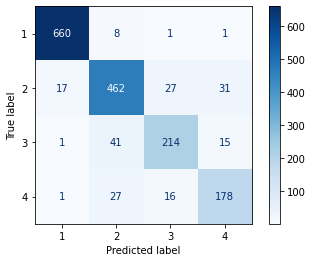

In [48]:
# build and fit classifier
rfe_pca = RFE(RandomForestClassifier(), step=1).fit(X_train_pca, y_train_pca)

# make prediction
y_pred_rfe_pca = rfe_pca.predict(X_test_pca)

# Print the results for both training and test
print(classification_report(y_test_pca, y_pred_rfe_pca))
print(f'Train accuracy:\t {rfe_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfe_pca.score(X_test_pca, y_test_pca)}')
scores_pca['RFE PCA'] = rfe_pca.score(X_test_pca, y_test_pca)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfe_pca, cmap='Blues')

### 1.6 LDA

LDA (Linear Discriminant Analysis) is a supervised learning algorithm that projects the input data into a lower-dimensional space while maximizing the class separability and minimizing the intra-class variance.

In [49]:
# Create the disctionary to store the results of lda models
scores_lda = {}

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# create the LDA
lda = LinearDiscriminantAnalysis(n_components=3)

# Apply the LDA to the dataset
X_lda = lda.fit(X, y).transform(X)

# Print the shape of the LDA dataset
X_lda.shape

(5664, 3)

In [51]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


Once created the new dataset using Linear Discriminant Analysis we apply the models to analyze the results.

#### 1.6.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.81      0.72       537
           3       0.52      0.47      0.49       271
           4       0.66      0.32      0.43       222

    accuracy                           0.76      1700
   macro avg       0.70      0.65      0.66      1700
weighted avg       0.76      0.76      0.75      1700

Train accuracy:	 0.7971745711402624
Test accuracy:	 0.7635294117647059


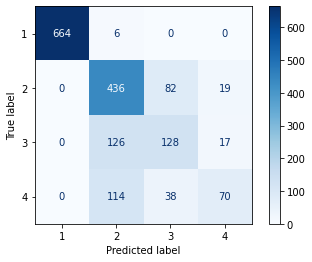

In [57]:
# build decision tree classifier
tree_lda = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_tree_lda = tree_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_tree_lda))
print(f'Train accuracy:\t {tree_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {tree_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Decision Tree LDA'] =  tree_lda.score(X_test_lda, y_test_lda)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_tree_lda, cmap='Blues')

#### 1.6.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.80      0.83      0.82       537
           3       0.74      0.69      0.71       271
           4       0.72      0.72      0.72       222

    accuracy                           0.86      1700
   macro avg       0.81      0.81      0.81      1700
weighted avg       0.86      0.86      0.86      1700

Train accuracy:	 0.8968213925327951
Test accuracy:	 0.8582352941176471


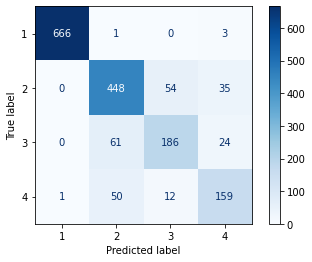

In [58]:
# build KNeighbors classifier
knn_lda = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
knn_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_knn_lda = knn_lda.predict(X_test_lda)

# Print the results for both training and test
print(classification_report(y_test_lda, y_pred_knn_lda))
print(f'Train accuracy:\t {knn_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {knn_lda.score(X_test_lda, y_test_lda)}')
scores_lda['KNN LDA'] =  knn_lda.score(X_test_lda, y_test_lda)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_knn_lda, cmap='Blues')

#### 1.6.3 MLP

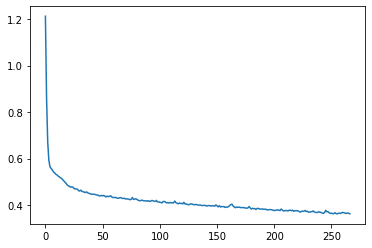

In [59]:
# build MLP classifier
mlp_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_lda.fit(X_train_lda, y_train_lda)
plt.plot(mlp_lda.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.74      0.82      0.78       537
           3       0.66      0.58      0.61       271
           4       0.62      0.56      0.59       222

    accuracy                           0.82      1700
   macro avg       0.75      0.74      0.74      1700
weighted avg       0.81      0.82      0.81      1700

Train accuracy:	 0.8521695257315842
Test accuracy:	 0.8164705882352942


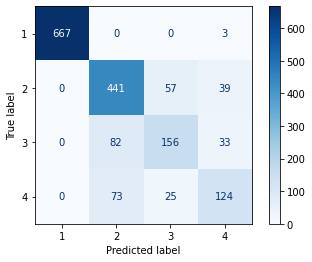

In [60]:
# make prediction
y_pred_mlp_lda = mlp_lda.predict(X_test_lda)

# Print the results for both training and test
print(classification_report(y_test_lda, y_pred_mlp_lda))
print(f'Train accuracy:\t {mlp_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {mlp_lda.score(X_test_lda, y_test_lda)}')
scores_lda['MLP LDA'] =  mlp_lda.score(X_test_lda, y_test_lda)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_mlp_lda, cmap='Blues')

#### 1.6.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.79      0.86      0.83       537
           3       0.75      0.70      0.72       271
           4       0.78      0.69      0.73       222

    accuracy                           0.87      1700
   macro avg       0.83      0.81      0.82      1700
weighted avg       0.87      0.87      0.86      1700

Train accuracy:	 0.9798183652875883
Test accuracy:	 0.8658823529411764


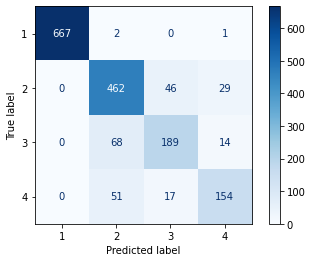

In [61]:
# build random forest classifier
rfc_lda = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_rfc_lda = rfc_lda.predict(X_test_lda)

# Print the results for both training and test
print(classification_report(y_test_lda, y_pred_rfc_lda))
print(f'Train accuracy:\t {rfc_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfc_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Random Forest LDA'] = rfc_lda.score(X_test_lda, y_test_lda)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfc_lda, cmap='Blues')

#### 1.6.5 Voting

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.80      0.86      0.83       537
           3       0.77      0.64      0.70       271
           4       0.70      0.73      0.72       222

    accuracy                           0.86      1700
   macro avg       0.82      0.81      0.81      1700
weighted avg       0.86      0.86      0.86      1700

Train accuracy:	 0.9331483350151363
Test accuracy:	 0.86


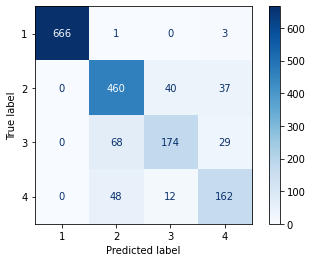

In [62]:
# build voting classifier
voting_classifier_lda = VotingClassifier(
    estimators=[
        ('tree_lda', tree_lda),
        ('knn_lda', knn_lda),
        ('mlp_lda', mlp_lda),
        ('rfc_lda', rfc_lda)
    ],
    voting='soft'
)
voting_classifier_lda = voting_classifier_lda.fit(X_train_lda, y_train_lda)


# make prediction
y_pred_voting_classifier_lda = voting_classifier_lda.predict(X_test_lda)

# Print the results for both training and test
print(classification_report(y_test_lda, y_pred_voting_classifier_lda))
print(f'Train accuracy:\t {voting_classifier_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {voting_classifier_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Voting Classifier LDA'] = voting_classifier_lda.score(X_test_lda, y_test_lda)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_voting_classifier_lda, cmap='Blues')

#### 1.6.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       670
           2       0.69      0.66      0.67       537
           3       0.54      0.58      0.56       271
           4       0.50      0.53      0.51       222

    accuracy                           0.76      1700
   macro avg       0.68      0.69      0.68      1700
weighted avg       0.76      0.76      0.76      1700

Train accuracy:	 0.9997477295660948
Test accuracy:	 0.758235294117647


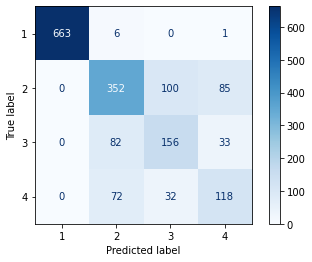

In [63]:
# build and fit classifier
rfe_lda = RFE(RandomForestClassifier(), step=1).fit(X_train_lda, y_train_lda)

# make prediction
y_pred_rfe_lda = rfe_lda.predict(X_test_lda)

# Print the results for both training and test
print(classification_report(y_test_lda, y_pred_rfe_lda))
print(f'Train accuracy:\t {rfe_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfe_lda.score(X_test_lda, y_test_lda)}')
scores_lda['RFE LDA'] = rfe_lda.score(X_test_lda, y_test_lda)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfe_lda, cmap='Blues')

## 2. Normalized values

Normalized values are values that have been rescaled or transformed to have a common scale or distribution, typically to a range between 0 and 1 or a standard normal distribution with mean 0 and standard deviation 1.

In [53]:
# Create the disctionary to store the results of normalized-data trained models
scores_scaled = {}

In [54]:
from sklearn.preprocessing import MinMaxScaler

# normalize values
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.00000000e-01, 4.26373942e-05, 5.22222222e-01, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [4.50000000e-01, 4.26373942e-05, 7.11111111e-01, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [4.50000000e-01, 4.26373942e-05, 7.11111111e-01, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00]])

In [55]:
# split X and y into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

(3964, 23) (1700, 23) (3964,) (1700,)


### 2.1 Decision tree Normalized


              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.92      0.76       537
           3       0.63      0.54      0.58       271
           4       0.78      0.11      0.20       222

    accuracy                           0.78      1700
   macro avg       0.76      0.64      0.63      1700
weighted avg       0.80      0.78      0.75      1700

Train accuracy:	 0.794904137235116
Test accuracy:	 0.7841176470588235


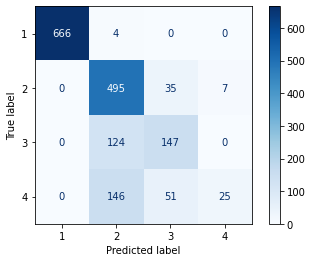

In [56]:
# build decision tree classifier
tree_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_tree_scaled = tree_scaled.predict(X_test_scaled)

# Print the results for both training and test
print(classification_report(y_test_scaled, y_pred_tree_scaled))
print(f'Train accuracy:\t {tree_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {tree_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Decision Tree (scaled)'] =  tree_scaled.score(X_test_scaled, y_test_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_tree_scaled, cmap='Blues')

### 2.2 KNeighbors Normalized

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.87      0.96      0.91       537
           3       0.91      0.81      0.86       271
           4       0.89      0.79      0.84       222

    accuracy                           0.93      1700
   macro avg       0.92      0.89      0.90      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9669525731584259
Test accuracy:	 0.928235294117647


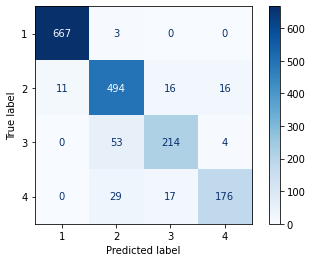

In [66]:
# build KNeighbors classifier
knn_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

# Print the results for both training and test
print(classification_report(y_test_scaled, y_pred_knn_scaled))
print(f'Train accuracy:\t {knn_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {knn_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['KNN (scaled)'] =  knn_scaled.score(X_test_scaled, y_test_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

### 2.3 MLP Normalized


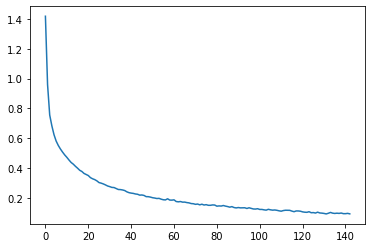

In [64]:
# build MLP classifier
mlp_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_scaled.fit(X_train_scaled, y_train_scaled)
plt.plot(mlp_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.88      0.90      0.89       537
           3       0.91      0.78      0.84       271
           4       0.78      0.88      0.82       222

    accuracy                           0.92      1700
   macro avg       0.89      0.89      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.965438950554995
Test accuracy:	 0.9158823529411765


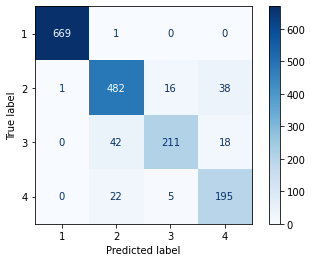

In [65]:
# make prediction
y_pred_mlp_scaled = mlp_scaled.predict(X_test_scaled)

# Print the results for both training and test
print(classification_report(y_test_scaled, y_pred_mlp_scaled))
print(f'Train accuracy:\t {mlp_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {mlp_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['MLP (scaled)'] =  mlp_scaled.score(X_test_scaled, y_test_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_mlp_scaled, cmap='Blues')

### 2.4 Random Forest Normalized


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.94      0.88      0.91       271
           4       0.92      0.92      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9582352941176471


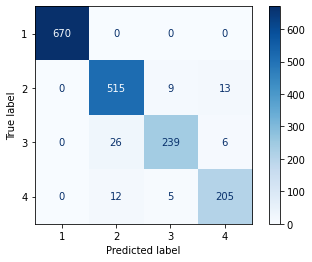

In [120]:
# build random forest classifier
rfc_scaled = RandomForestClassifier()
# train random forest
rfc_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_rfc_scaled = rfc_scaled.predict(X_test_scaled)

# Print the results for both training and test
print(classification_report(y_test_scaled, y_pred_rfc_scaled))
print(f'Train accuracy:\t {rfc_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfc_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Random Forest (scaled)'] = rfc_scaled.score(X_test_scaled, y_test_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfc_scaled, cmap='Blues')

### 2.5 Voting Normalized

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.91      0.94      0.93       537
           3       0.91      0.87      0.89       271
           4       0.89      0.88      0.89       222

    accuracy                           0.94      1700
   macro avg       0.93      0.92      0.93      1700
weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.9939455095862765
Test accuracy:	 0.9441176470588235


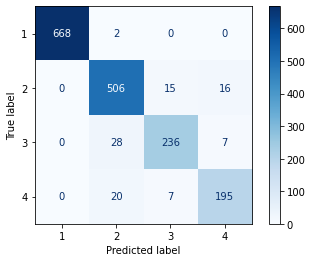

In [121]:
# build voting classifier
voting_classifier_scaled = VotingClassifier(
    estimators=[
        ('tree_scaled', tree_scaled),
        ('knn_scaled', knn_scaled),
        ('mlp_scaled', mlp_scaled),
        ('rfc_scaled', rfc_scaled)
    ],
    voting='soft'
)
voting_classifier_scaled = voting_classifier_scaled.fit(X_train_scaled, y_train_scaled)


# make prediction
y_pred_voting_classifier_scaled = voting_classifier_scaled.predict(X_test_scaled)

# Print the results for both training and test
print(classification_report(y_test_scaled, y_pred_voting_classifier_scaled))
print(f'Train accuracy:\t {voting_classifier_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {voting_classifier_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Voting Classifier (scaled)'] = voting_classifier_scaled.score(X_test_scaled, y_test_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_voting_classifier_scaled, cmap='Blues')

### 2.6 Recursive Feature Elimination Normalized

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.92      0.96      0.94       537
           3       0.94      0.86      0.89       271
           4       0.91      0.91      0.91       222

    accuracy                           0.95      1700
   macro avg       0.94      0.93      0.94      1700
weighted avg       0.95      0.95      0.95      1700

Train accuracy:	 0.9997477295660948
Test accuracy:	 0.951764705882353


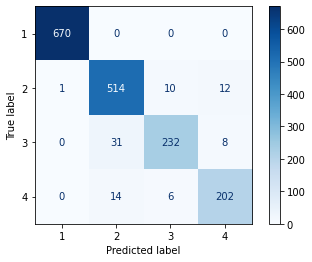

In [122]:
# build and fit classifier
rfe_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_rfe_scaled = rfe_scaled.predict(X_test_scaled)

# Print the results for both training and test
print(classification_report(y_test_scaled, y_pred_rfe_scaled))
print(f'Train accuracy:\t {rfe_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfe_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['RFE (scaled)'] = rfe_scaled.score(X_test_scaled, y_test_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfe_scaled, cmap='Blues')

### 2.5 PCA Normalized

In [67]:
# Create a discionary for the scores using the dataset with pca normalized applied
scores_pca_scaled = {}

In [68]:
# Create the PCA
pca_scaled = PCA(n_components=12)

# apply the PCA to the dataset
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Print the shape of the PCA dataset
X_pca_scaled.shape, y.shape

((5664, 12), (5664,))

In [69]:
pca_scaled.explained_variance_ratio_

array([0.37473455, 0.1467854 , 0.09238494, 0.07108462, 0.06132245,
       0.04459581, 0.03300204, 0.03048735, 0.0258334 , 0.02049674,
       0.01632387, 0.01568342])

In [70]:
pca_scaled.explained_variance_ratio_.sum()

0.9327345792164145

We can see that in the normalized version the PCA reduction it needs more components to avoid loss information and even with 12 components we have 93% of the information. 

In [71]:
# split X and y into training and testing sets
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca_scaled.shape, X_test_pca_scaled.shape, y_train_pca_scaled.shape, y_test_pca_scaled.shape)

(3964, 12) (1700, 12) (3964,) (1700,)


### 2.5.1 Decision tree with PCA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.59      0.88      0.70       537
           3       0.77      0.28      0.41       271
           4       0.38      0.24      0.29       222

    accuracy                           0.74      1700
   macro avg       0.68      0.60      0.60      1700
weighted avg       0.75      0.74      0.72      1700

Train accuracy:	 0.7714429868819375
Test accuracy:	 0.7429411764705882


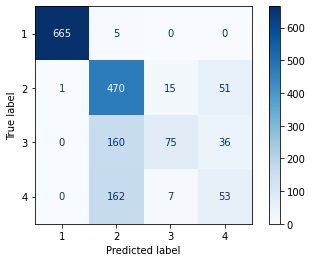

In [72]:
# build decision tree classifier
tree_pca_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_tree_pca_scaled = tree_pca_scaled.predict(X_test_pca_scaled)

# Print the results for both training and test
print(classification_report(y_test_pca_scaled, y_pred_tree_pca_scaled))
print(f'Train accuracy:\t {tree_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {tree_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Decision Tree PCA (scaled)'] =  tree_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_tree_pca_scaled, cmap='Blues')

### 2.5.2 KNeighbors with PCA & Normalized

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.85      0.96      0.90       537
           3       0.92      0.78      0.85       271
           4       0.89      0.80      0.84       222

    accuracy                           0.92      1700
   macro avg       0.92      0.88      0.90      1700
weighted avg       0.93      0.92      0.92      1700

Train accuracy:	 0.9661957618567104
Test accuracy:	 0.9235294117647059


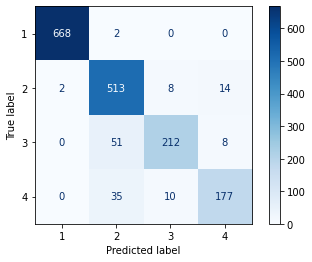

In [73]:
# build KNeighbors classifier
knn_pca_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_knn_pca_scaled = knn_pca_scaled.predict(X_test_pca_scaled)

# Print the results for both training and test
print(classification_report(y_test_pca_scaled, y_pred_knn_pca_scaled))
print(f'Train accuracy:\t {knn_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {knn_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['KNN PCA (scaled)'] =  knn_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_knn_pca_scaled, cmap='Blues')

### 2.5.3 MLP with PCA & Normalized

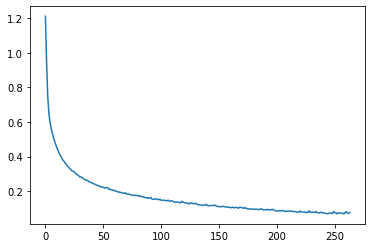

In [74]:
# build MLP classifier
mlp_pca_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)
plt.plot(mlp_pca_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.89      0.90      0.90       537
           3       0.84      0.85      0.84       271
           4       0.84      0.82      0.83       222

    accuracy                           0.92      1700
   macro avg       0.89      0.89      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9730070635721494
Test accuracy:	 0.9176470588235294


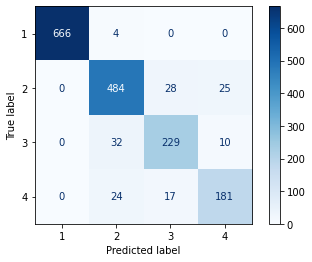

In [75]:
# make prediction
y_pred_mlp_pca_scaled = mlp_pca_scaled.predict(X_test_pca_scaled)

# Print the results for both training and test
print(classification_report(y_test_pca_scaled, y_pred_mlp_pca_scaled))
print(f'Train accuracy:\t {mlp_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {mlp_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['MLP PCA (scaled)'] =  mlp_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_mlp_pca_scaled, cmap='Blues')

### 2.5.4 Random Forest with PCA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.86      0.94      0.90       537
           3       0.89      0.80      0.84       271
           4       0.87      0.79      0.83       222

    accuracy                           0.92      1700
   macro avg       0.90      0.88      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9876387487386479
Test accuracy:	 0.918235294117647


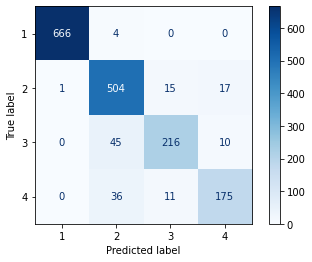

In [76]:
# build random forest classifier
rfc_pca_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_rfc_pca_scaled = rfc_pca_scaled.predict(X_test_pca_scaled)

# Print the results for both training and test
print(classification_report(y_test_pca_scaled, y_pred_rfc_pca_scaled))
print(f'Train accuracy:\t {rfc_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Random Forest PCA (scaled)'] = rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfc_pca_scaled, cmap='Blues')

### 2.5.5 Voting with PCA & Normalized

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.88      0.93      0.90       537
           3       0.93      0.81      0.87       271
           4       0.85      0.87      0.86       222

    accuracy                           0.93      1700
   macro avg       0.91      0.90      0.91      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9911705348133198
Test accuracy:	 0.9288235294117647


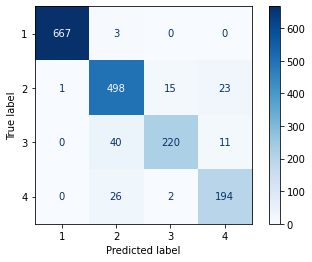

In [77]:
# build voting classifier
voting_classifier_pca_scaled = VotingClassifier(
    estimators=[
        ('tree_pca_scaled', tree_pca_scaled),
        ('knn_pca_scaled', knn_pca_scaled),
        ('mlp_pca_scaled', mlp_pca_scaled),
        ('rfc_pca_scaled', rfc_pca_scaled)
    ],
    voting='soft'
)
voting_classifier_pca_scaled = voting_classifier_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)


# make prediction
y_pred_voting_classifier_pca_scaled = voting_classifier_pca_scaled.predict(X_test_pca_scaled)

# Print the results for both training and test
print(classification_report(y_test_pca_scaled, y_pred_voting_classifier_pca_scaled))
print(f'Train accuracy:\t {voting_classifier_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {voting_classifier_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Voting Classifier PCA (scaled)'] = voting_classifier_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_voting_classifier_pca_scaled, cmap='Blues')

### 2.5.6 Recursive Feature Elimination with PCA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.88      0.93      0.91       537
           3       0.91      0.83      0.87       271
           4       0.85      0.84      0.84       222

    accuracy                           0.93      1700
   macro avg       0.91      0.90      0.90      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 1.0
Test accuracy:	 0.9288235294117647


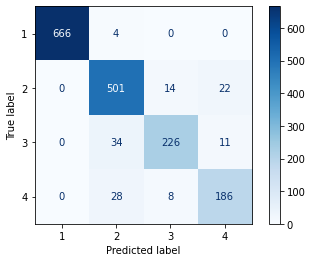

In [78]:
# build and fit classifier
rfe_pca_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_rfe_pca_scaled = rfe_pca_scaled.predict(X_test_pca_scaled)

# Print the results for both training and test
print(classification_report(y_test_pca_scaled, y_pred_rfe_pca_scaled))
print(f'Train accuracy:\t {rfe_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfe_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['RFE PCA (scaled)'] = rfe_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfe_pca_scaled, cmap='Blues')

### 2.6 LDA Normalized

In [102]:
# Create the disctionary to store the results of lda normalized models
scores_lda_scaled = {}

In [103]:
# create the LDA
lda_scaled = LinearDiscriminantAnalysis(n_components=2)

# Apply the LDA to the dataset
X_lda_scaled = lda_scaled.fit(X_scaled, y).transform(X_scaled)

# Print the shape of the LDA dataset
X_lda_scaled.shape

(5664, 2)

In [104]:
# split X and y into training and testing sets
X_train_lda_scaled, X_test_lda_scaled, y_train_lda_scaled, y_test_lda_scaled = train_test_split(X_lda_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda_scaled.shape, X_test_lda_scaled.shape, y_train_lda_scaled.shape, y_test_lda_scaled.shape)

(3964, 2) (1700, 2) (3964,) (1700,)


### 2.6.1 Decision tree with LDA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.80      0.71       537
           3       0.55      0.44      0.49       271
           4       0.50      0.32      0.39       222

    accuracy                           0.76      1700
   macro avg       0.67      0.64      0.65      1700
weighted avg       0.75      0.76      0.75      1700

Train accuracy:	 0.7835519677093845
Test accuracy:	 0.7558823529411764


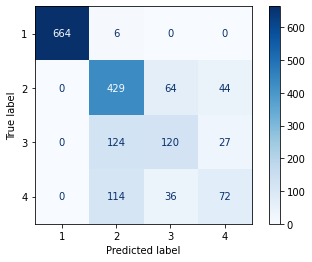

In [105]:
# build decision tree classifier
tree_lda_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_tree_lda_scaled = tree_lda_scaled.predict(X_test_lda_scaled)

# Print the results for both training and test
print(classification_report(y_test_lda_scaled, y_pred_tree_lda_scaled))
print(f'Train accuracy:\t {tree_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {tree_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Decision Tree LDA (scaled)'] =  tree_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_tree_lda_scaled, cmap='Blues')

### 2.6.2 KNeighbors with LDA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.72      0.87      0.79       537
           3       0.70      0.62      0.66       271
           4       0.79      0.54      0.64       222

    accuracy                           0.83      1700
   macro avg       0.80      0.75      0.77      1700
weighted avg       0.84      0.83      0.83      1700

Train accuracy:	 0.9195257315842583
Test accuracy:	 0.8347058823529412


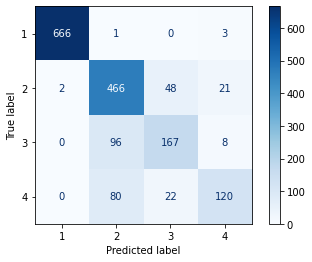

In [106]:
# build KNeighbors classifier
knn_lda_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_knn_lda_scaled = knn_lda_scaled.predict(X_test_lda_scaled)

# Print the results for both training and test
print(classification_report(y_test_lda_scaled, y_pred_knn_lda_scaled))
print(f'Train accuracy:\t {knn_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {knn_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['KNN LDA (scaled)'] =  knn_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_knn_lda_scaled, cmap='Blues')

### 2.6.3 MLP with LDA & Normalized

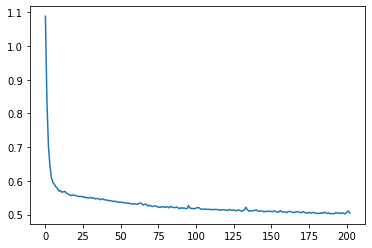

In [107]:
# build MLP classifier
mlp_lda_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)
plt.plot(mlp_lda_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.66      0.72      0.69       537
           3       0.46      0.45      0.46       271
           4       0.35      0.30      0.32       222

    accuracy                           0.73      1700
   macro avg       0.62      0.62      0.62      1700
weighted avg       0.72      0.73      0.73      1700

Train accuracy:	 0.7658930373360242
Test accuracy:	 0.7288235294117648


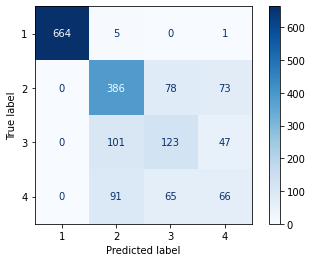

In [108]:
# make prediction
y_pred_mlp_lda_scaled = mlp_lda_scaled.predict(X_test_lda_scaled)

# Print the results for both training and test
print(classification_report(y_test_lda_scaled, y_pred_mlp_lda_scaled))
print(f'Train accuracy:\t {mlp_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {mlp_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['MLP LDA (scaled)'] =  mlp_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_mlp_lda_scaled, cmap='Blues')

### 2.6.4 Random Forest with LDA & Normalized

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.77      0.84      0.80       537
           3       0.70      0.65      0.67       271
           4       0.73      0.64      0.69       222

    accuracy                           0.84      1700
   macro avg       0.80      0.78      0.79      1700
weighted avg       0.84      0.84      0.84      1700

Train accuracy:	 0.9765388496468214
Test accuracy:	 0.8441176470588235


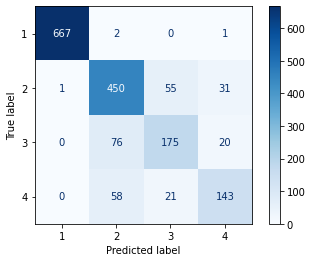

In [109]:
# build random forest classifier
rfc_lda_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_rfc_lda_scaled = rfc_lda_scaled.predict(X_test_lda_scaled)

# Print the results for both training and test
print(classification_report(y_test_lda_scaled, y_pred_rfc_lda_scaled))
print(f'Train accuracy:\t {rfc_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Random Forest LDA (scaled)'] = rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfc_lda_scaled, cmap='Blues')

### 2.6.5 Voting with LDA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.75      0.85      0.80       537
           3       0.72      0.63      0.67       271
           4       0.73      0.63      0.68       222

    accuracy                           0.84      1700
   macro avg       0.80      0.78      0.79      1700
weighted avg       0.84      0.84      0.84      1700

Train accuracy:	 0.9457618567103936
Test accuracy:	 0.8429411764705882


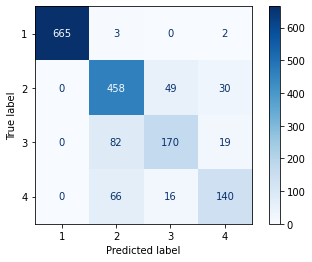

In [110]:
# build voting classifier
voting_classifier_lda_scaled = VotingClassifier(
    estimators=[
        ('tree_lda_scaled', tree_lda_scaled),
        ('knn_lda_scaled', knn_lda_scaled),
        ('mlp_lda_scaled', mlp_lda_scaled),
        ('rfc_lda_scaled', rfc_lda_scaled)
    ],
    voting='soft'
)
voting_classifier_lda_scaled = voting_classifier_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)


# make prediction
y_pred_voting_classifier_lda_scaled = voting_classifier_lda_scaled.predict(X_test_lda_scaled)

# Print the results for both training and test
print(classification_report(y_test_lda_scaled, y_pred_voting_classifier_lda_scaled))
print(f'Train accuracy:\t {voting_classifier_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {voting_classifier_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Voting Classifier LDA (scaled)'] = voting_classifier_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_voting_classifier_lda_scaled, cmap='Blues')

### 2.6.5 Recursive Feature Elimination with LDA & Normalized

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       670
           2       0.69      0.66      0.67       537
           3       0.54      0.58      0.56       271
           4       0.50      0.54      0.52       222

    accuracy                           0.76      1700
   macro avg       0.68      0.69      0.69      1700
weighted avg       0.76      0.76      0.76      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.7588235294117647


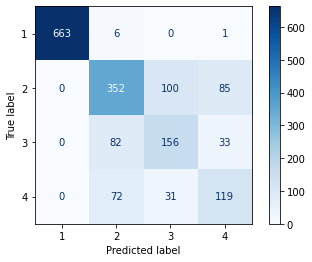

In [111]:
# build and fit classifier
rfe_lda_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_rfe_lda_scaled = rfe_lda_scaled.predict(X_test_lda_scaled)

# Print the results for both training and test
print(classification_report(y_test_lda_scaled, y_pred_rfe_lda_scaled))
print(f'Train accuracy:\t {rfe_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfe_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['RFE LDA (scaled)'] = rfe_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfe_lda_scaled, cmap='Blues')

# Final scores

## Non-normalized
A graphical analysis of the results of the non-normalized testes without and with PCA and LDA.

Text(0, 0.5, 'Models')

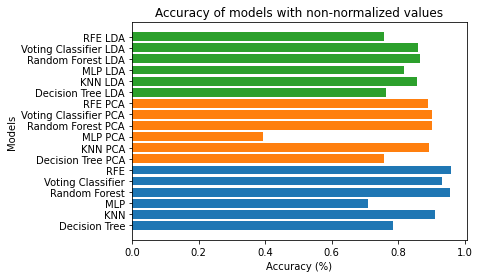

In [112]:
plt.barh(list(scores.keys()), scores.values())
plt.barh(list(scores_pca.keys()), scores_pca.values())
plt.barh(list(scores_lda.keys()), scores_lda.values())
plt.title('Accuracy of models with non-normalized values')
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')

In this graphic we can see that if we analyze by groups the data presented in the LDA model shows slightly worst results than PCA and regular, but the worst results are in the MLP with PCA. 

In general we can see that non-normalized data tent to give better results without the creation of a lower-dimensional space, this could be because of the fact that without the normalization it's hard to accurately reduce the data dimension in a efficient way. 

In [113]:
# Print the socres of the three attempts
print(f'Scores: {scores}\n')
print(f'Scores PCA: {scores_pca}\n')
print(f'Scores LDA: {scores_lda}')

Scores: {'Decision Tree': 0.7841176470588235, 'KNN': 0.9123529411764706, 'MLP': 0.71, 'Random Forest': 0.9570588235294117, 'Voting Classifier': 0.9311764705882353, 'RFE': 0.9588235294117647}

Scores PCA: {'Decision Tree PCA': 0.7564705882352941, 'KNN PCA': 0.8929411764705882, 'MLP PCA': 0.3941176470588235, 'Random Forest PCA': 0.9005882352941177, 'Voting Classifier PCA': 0.9011764705882352, 'RFE PCA': 0.8905882352941177}

Scores LDA: {'Decision Tree LDA': 0.7635294117647059, 'KNN LDA': 0.8582352941176471, 'MLP LDA': 0.8164705882352942, 'Random Forest LDA': 0.8658823529411764, 'Voting Classifier LDA': 0.86, 'RFE LDA': 0.758235294117647}


In [114]:
# get the highest accuracy
max(max(scores.values()), max(scores_pca.values()), max(scores_lda.values()))

0.9588235294117647

## Normalized
A graphical analysis of the results of the normalized testes without and with PCA and LDA.

Text(0, 0.5, 'Models')

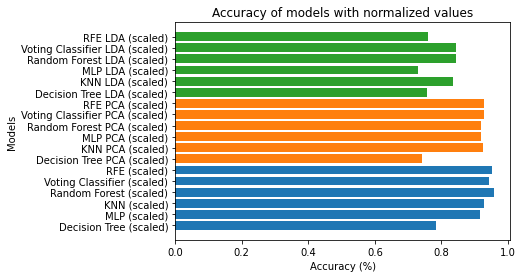

In [124]:
plt.barh(list(scores_scaled.keys()), scores_scaled.values())
plt.barh(list(scores_pca_scaled.keys()), scores_pca_scaled.values())
plt.barh(list(scores_lda_scaled.keys()), scores_lda_scaled.values())
plt.title('Accuracy of models with normalized values')
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')

Here we can see that for the normalized data the results are much more better in general and all the models are near the 80% of accuracy, the LDA being the worst and the model without the LDA or the PCA presenting the best results, this could mean that perhaps this reduction methods are not the most effective way to reduce the dataset for the objective in question. 

In [125]:
print(f'Scores: {scores_scaled}\n')
print(f'Scores PCA: {scores_pca_scaled}\n')
print(f'Scores LDA: {scores_lda_scaled}')

Scores: {'Decision Tree (scaled)': 0.7841176470588235, 'MLP (scaled)': 0.9158823529411765, 'KNN (scaled)': 0.928235294117647, 'Random Forest (scaled)': 0.9582352941176471, 'Voting Classifier (scaled)': 0.9441176470588235, 'RFE (scaled)': 0.951764705882353}

Scores PCA: {'Decision Tree PCA (scaled)': 0.7429411764705882, 'KNN PCA (scaled)': 0.9235294117647059, 'MLP PCA (scaled)': 0.9176470588235294, 'Random Forest PCA (scaled)': 0.918235294117647, 'Voting Classifier PCA (scaled)': 0.9288235294117647, 'RFE PCA (scaled)': 0.9288235294117647}

Scores LDA: {'Decision Tree LDA (scaled)': 0.7558823529411764, 'KNN LDA (scaled)': 0.8347058823529412, 'MLP LDA (scaled)': 0.7288235294117648, 'Random Forest LDA (scaled)': 0.8441176470588235, 'Voting Classifier LDA (scaled)': 0.8429411764705882, 'RFE LDA (scaled)': 0.7588235294117647}


In [126]:
# get the highest accuracy
max(max(scores_scaled.values()), max(scores_pca_scaled.values()), max(scores_lda_scaled.values()))

0.9582352941176471

# Feature importance

Feature importance is a metric that measures the relative importance of each feature in the classification task.

Text(0.5, 1.0, 'Importance of each feature')

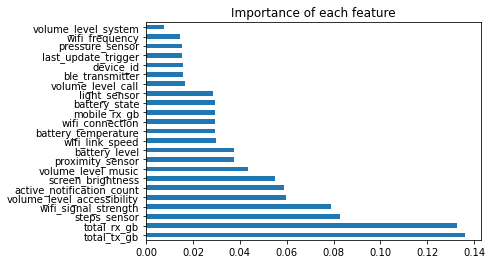

In [118]:
pd.Series(
    rfc.feature_importances_, index=X.columns
).nlargest(len(X.columns)).plot(kind='barh').set_title('Importance of each feature')

For the Random Forest Classifier the feature importance score is computed by averaging the decrease in impurity across all the decision trees in the forest that use that feature for splitting. The importance score reflects the contribution of each feature to the accuracy and robustness of the classifier, and can help to identify the most informative and relevant features for the task.

Text(0.5, 1.0, 'Importance of each feature')

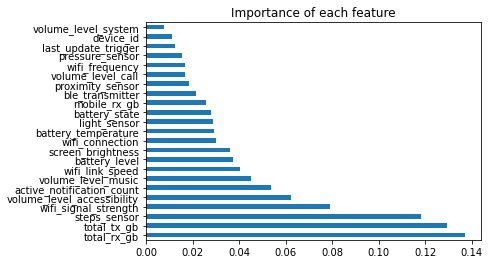

In [123]:
pd.Series(
    rfc_scaled.feature_importances_, index=X.columns
).nlargest(len(X.columns)).plot(kind='barh').set_title('Importance of each feature')

Here there's another graphic of the feature importance of the RFC model but for the scaled data we can see that for some features the normalization didn't affect their importance, but for other features with lower importance there's significant impact in the order, as for example the Wifi Frequency, which increase his importance in comparison with the non-normalized data. 

## SelectKBest

"SelectKBest" is a feature selection technique in machine learning that selects the top K most important features based on their scores in a univariate statistical test.

The algorithm works by computing a statistical score for each feature in the dataset, such as F-test or chi-squared test, and then selecting the top K features with the highest scores. This approach is known as univariate feature selection because it evaluates each feature independently of the others.

"SelectKBest" can be useful for reducing the dimensionality of a dataset and improving the performance of machine learning models by eliminating less important features that may cause overfitting or increase the computational complexity of the model.






In [129]:
df_test = pd.concat([
    pd.DataFrame(X_scaled, columns=X.columns), y.reset_index()], axis=1
).drop('time', axis=1)
df_test

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id,last_used_app
0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.001468,0.74,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
1,0.00,0.000000,0.000000,0.0,0.537530,0.0,0.001468,0.73,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,0.00,0.000000,0.000000,0.0,0.527845,0.0,0.001468,0.72,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
3,0.00,0.000000,0.000000,0.0,0.530266,0.0,0.001468,0.71,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
4,0.00,0.000000,0.000000,0.0,0.523002,0.0,0.001468,0.70,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,0.10,0.001364,0.400000,0.0,0.441889,0.0,0.502055,0.76,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5660,0.45,0.000863,0.444444,0.0,0.426150,0.0,0.502055,0.76,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5661,0.50,0.000043,0.522222,0.0,0.415254,0.0,0.516735,0.75,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5662,0.45,0.000043,0.711111,0.0,0.415254,0.0,0.516735,0.75,0.348315,0.018969,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3


## Best features

The best features are the subset of features that are most relevant and contribute the most to the performance of the model. These features are typically selected by using feature selection algorithms such as "SelectKBest", "Recursive Feature Elimination", or "SelectFromModel". in this case SelectKBest

In [130]:
from sklearn.feature_selection import SelectKBest, chi2

def best_features(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    # naming the dataframe columns
    feature_scores.columns = ['Feature', 'Score']
    # print 10 best features
    return feature_scores.nlargest(10, 'Score')

best_features(df_test, 'last_used_app')

,Feature,Score
14,volume_level_call,1262.550058
10,wifi_frequency,1185.699946
12,proximity_sensor,1041.605441
21,ble_transmitter,945.368318
16,volume_level_accessibility,944.282341
11,total_rx_gb,848.841101
3,pressure_sensor,791.953256
13,steps_sensor,785.705721
9,total_tx_gb,779.377434
15,volume_level_music,621.247050


## Worst features

The worst features are those that are least relevant and contribute the least to the performance of the model. These features can cause overfitting or increase the computational complexity of the model and may need to be removed to improve the model's performance.

In [131]:
def worst_features(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    # concat two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    
    # naming the dataframe columns
    feature_scores.columns = ['Feature', 'Score']
    
    # print 10 best features
    return feature_scores.nsmallest(10, 'Score')

worst_features(df_test, 'last_used_app')

,Feature,Score
1,light_sensor,14.215015
22,device_id,14.693283
4,battery_temperature,113.741227
7,battery_level,113.828359
19,volume_level_system,277.332229
0,last_update_trigger,287.513745
5,screen_brightness,336.342224
8,wifi_signal_strength,379.430444
2,active_notification_count,421.114055
20,battery_state,423.202837


## Largest features
The largest features are those that have the highest number of dimensions or values, such as high-resolution images or large text documents. These features can require significant computational resources and processing time to analyze, and may need to be pre-processed or transformed to reduce their dimensionality or size.

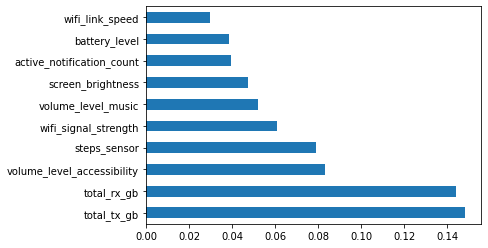

Index(['total_tx_gb', 'total_rx_gb', 'volume_level_accessibility',
       'steps_sensor', 'wifi_signal_strength', 'volume_level_music',
       'screen_brightness', 'active_notification_count', 'battery_level',
       'wifi_link_speed'],
      dtype='object')


In [132]:
def largest(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    model = RandomForestClassifier()
    model.fit(X, y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()
    print(feat_importances.nlargest(10).index)

largest(df_test, 'last_used_app')

## Smallest features
The smallest features are those that have the lowest number of dimensions or values, such as binary indicators or categorical variables with few categories. These features are typically easier and faster to analyze and may require less computational resources. However, they can also be less informative or discriminating, and may need to be combined or transformed to capture more complex relationships between the variables.

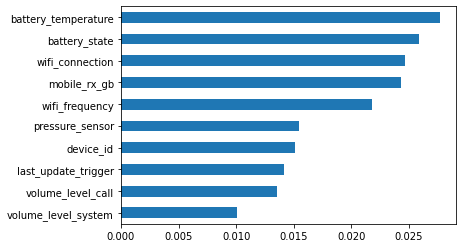

['volume_level_system',
 'volume_level_call',
 'last_update_trigger',
 'device_id',
 'pressure_sensor',
 'wifi_frequency',
 'mobile_rx_gb',
 'wifi_connection',
 'battery_state',
 'battery_temperature']

In [133]:
def smallest(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    from sklearn.ensemble import ExtraTreesClassifier
    model = RandomForestClassifier()
    model.fit(X, y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nsmallest(10).plot(kind='barh')
    plt.show()
    return feat_importances.nsmallest(10).index.to_list()

smallest(df_test, 'last_used_app')

## RFE

RFE stands for Recursive Feature Elimination, and it is a feature selection algorithm that works by recursively removing features from a model and selecting the ones that contribute the most to its performance.

It begins by training a model on all the available features, and then it ranks the importance of each feature based on its impact on the model's performance. Then, the algorithm removes the least important feature and trains the model again, repeating the process until a desired number of features is reached or the model's performance stops improving.

RFE is a backward feature selection algorithm, which means that it starts with all features and eliminates the least important ones until the desired number of features is reached. This approach contrasts with forward selection, which starts with the most important feature and adds additional ones until the desired number of features is reached.


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.95      0.87      0.91       271
           4       0.93      0.93      0.93       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.9582352941176471


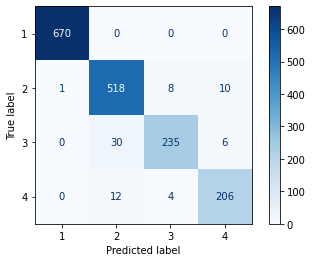

In [134]:
from sklearn.feature_selection import RFE

model = RFE(RandomForestClassifier(), step=1).fit(X_train, y_train)

# make prediction
y_pred_model = model.predict(X_test)

# Print the results for both training and test
print(classification_report(y_test, y_pred_model))
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_model, cmap='Blues')

In [137]:
# Get a list of Features names
model.get_feature_names_out()

array(['active_notification_count', 'battery_temperature',
       'screen_brightness', 'battery_level', 'wifi_signal_strength',
       'total_tx_gb', 'total_rx_gb', 'steps_sensor', 'volume_level_music',
       'volume_level_accessibility', 'wifi_connection'], dtype=object)

In [ ]:
print(f'{"Feature":^28}|{"Selected":^12}|{"Rank":^6}')
for i in range(X_train_scaled.shape[1]):
    # print table of all summarized features
    print('\033[4m' + f'{df_test.columns[i]:<28}|{"Yes" if model.support_[i] else "No":^12}|{model.ranking_[i]:^6}' + '\033[0m')

          Feature           |  Selected  | Rank 
last_update_trigger         |     No     |  12  
light_sensor                |    Yes     |  1   
active_notification_count   |    Yes     |  1   
pressure_sensor             |     No     |  9   
battery_temperature         |     No     |  2   
screen_brightness           |    Yes     |  1   
wifi_link_speed             |    Yes     |  1   
battery_level               |    Yes     |  1   
wifi_signal_strength        |    Yes     |  1   
total_tx_gb                 |    Yes     |  1   
wifi_frequency              |     No     |  7   
total_rx_gb                 |    Yes     |  1   
proximity_sensor            |     No     |  5   
steps_sensor                |    Yes     |  1   
volume_level_call           |     No     |  8   
volume_level_music          |     No     |  3   
volume_level_accessibility  |    Yes     |  1   
wifi_connection             |     No     |  4   
mobile_rx_gb                |     No     |  6   
volume_level_system 

In this table we can see the features that where selected by the model as important and which don't

### Manual test with Random Forest and Recursive Feature Elimination

Here we manually select the most important features to train our best model and see if the results of the previous tests maintain with only this features.

In [135]:
X_new = X[model.get_feature_names_out()]
X_new

,active_notification_count,battery_temperature,screen_brightness,battery_level,wifi_signal_strength,total_tx_gb,total_rx_gb,steps_sensor,volume_level_music,volume_level_accessibility,wifi_connection
time,,,,,,,,,,,
2023-01-17 00:15:00,0.00,0.00,0.0,74.0,0.0,0.000,0.000,0.0,0.0,0.0,1
2023-01-17 00:30:00,0.00,22.20,0.0,73.0,0.0,0.000,0.000,0.0,0.0,0.0,1
2023-01-17 00:45:00,0.00,21.80,0.0,72.0,0.0,0.000,0.000,0.0,0.0,0.0,1
2023-01-17 01:00:00,0.00,21.90,0.0,71.0,0.0,0.000,0.000,0.0,0.0,0.0,1
2023-01-17 01:15:00,0.00,21.60,0.0,70.0,0.0,0.000,0.000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,9.00,18.25,0.0,76.0,-58.0,0.135,3.625,586.0,3.0,4.0,1
2023-01-26 19:15:00,10.00,17.60,0.0,76.0,-58.0,0.135,3.625,586.0,3.0,4.0,1
2023-01-26 19:30:00,11.75,17.15,0.0,75.0,-58.0,0.135,3.626,586.0,3.0,4.0,1


### Split dataset into train and test sets

In [136]:
# split X and y into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.30, random_state=42, stratify=y)

print(X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape)

(3964, 11) (1700, 11) (3964,) (1700,)


### Random Forest for Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.95      0.94       537
           3       0.94      0.86      0.90       271
           4       0.90      0.92      0.91       222

    accuracy                           0.95      1700
   macro avg       0.94      0.93      0.94      1700
weighted avg       0.95      0.95      0.95      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.9529411764705882


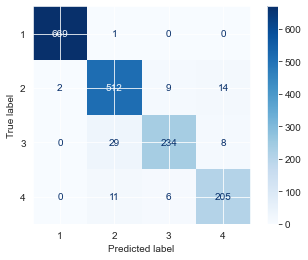

In [ ]:
# build random forest classifier
model_rfc = RandomForestClassifier()
# train random forest
model_rfc.fit(X_new_train, y_new_train)

# make prediction
y_pred_model_rfc = model_rfc.predict(X_new_test)

# Print the results for both training and test
print(classification_report(y_new_test, y_pred_model_rfc))
print(f'Train accuracy:\t {model_rfc.score(X_new_train, y_new_train)}')
print(f'Test accuracy:\t {model_rfc.score(X_new_test, y_new_test)}')

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_new_test, y_pred_model_rfc, cmap='Blues')

As we can see by using only the most important features (11) we can obtain results of 95% which are very near of our better model in the normalization section, this proves that the feature selection made in this part of the test really holds the most important aspects of the data for the classifier that we are trying to build. 

## SelectFromModel

"SelectFromModel" is a feature selection technique in machine learning that selects a subset of features based on the importance of their weights or coefficients in a trained model.

<!-- In the context of scikit-learn, after performing feature selection using a selector like "SelectFromModel", the transformed dataset can be obtained by calling the "transform" method on the selector object with the original dataset "x" as the input.

The "transform" method applies the selected feature subset to the input dataset "x" and returns a transformed dataset that only contains the selected features. This allows for subsequent analysis and modeling using only the most relevant features.

For example, after performing feature selection with "SelectFromModel", you might use "selector.transform(x)" to obtain a new dataset "x_new" with only the selected features, and then train a model on the reduced dataset "x_new". -->


In [141]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(
    estimator=LogisticRegression(),
    threshold=0.015,
    prefit=False,
    norm_order=1,
    max_features=5
).fit(X, y)

# Create the features selected
select_x = selector.transform(X)

c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Split dataset into train and test sets

In [139]:
# split X and y into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(select_x, y, test_size=0.30, random_state=42, stratify=y)

print(X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape)

(3964, 2) (1700, 2) (3964,) (1700,)


### Random Forest for SelectFromModel

              precision    recall  f1-score   support

           1       0.76      0.78      0.77       670
           2       0.63      0.67      0.65       537
           3       0.63      0.53      0.57       271
           4       0.58      0.54      0.56       222

    accuracy                           0.68      1700
   macro avg       0.65      0.63      0.64      1700
weighted avg       0.67      0.68      0.67      1700

Train accuracy:	 0.9687184661957619
Test accuracy:	 0.6758823529411765


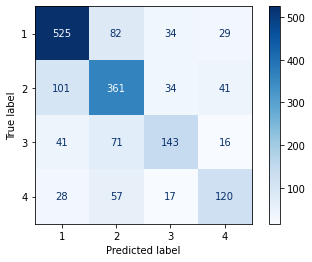

In [140]:
# build random forest classifier
model_rfc = RandomForestClassifier()
# train random forest
model_rfc.fit(X_new_train, y_new_train)

# make prediction
y_pred_model_rfc = model_rfc.predict(X_new_test)

# Print the results for both training and test
print(classification_report(y_new_test, y_pred_model_rfc))
print(f'Train accuracy:\t {model_rfc.score(X_new_train, y_new_train)}')
print(f'Test accuracy:\t {model_rfc.score(X_new_test, y_new_test)}')

# Create and display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_new_test, y_pred_model_rfc, cmap='Blues')

As the results show this algorithms  does not have good results for the data.

## Coeficients

The coefficients are often used to interpret the importance of each feature in the model and to identify the direction and strength of their relationships with the output label. Positive coefficients indicate a positive correlation between the input feature and the output label, while negative coefficients indicate a negative correlation. The magnitude of the coefficient indicates the strength of the correlation, with larger coefficients indicating a stronger impact on the output label.

### Split dataset into train and test sets

In [143]:
# split X and y into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape)

(3964, 23) (1700, 23) (3964,) (1700,)


In [144]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as pyplot

model = LogisticRegression()
model.fit(X_train, y_train)

importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=True)

c:\Users\Dasil\anaconda3\envs\FD\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


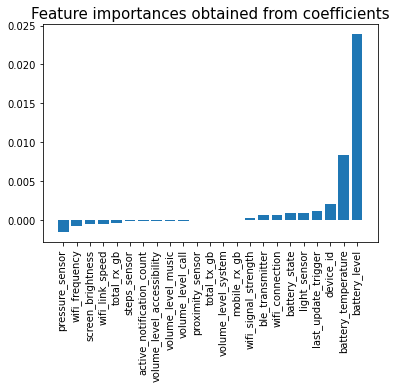

In [146]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

### Obtained Importances from a tree-based model

In [147]:
tree.fit(X_train, y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': tree.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)


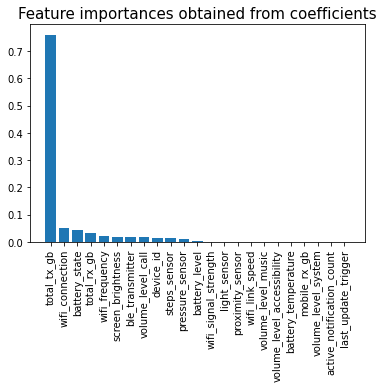

In [148]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()